***Troop Analysis*** <br>
Authors: Aurelien Giuglaris Michael, Laurent Bijman, Antoine Dorard


**Load Troop Data** <br>
Load troop data and do some first cleaning. Special, seasonal troops and troops unlocked at townhall higher than 9 are dropped.

In [102]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

# Load the json file using pandas
def get_troop_data(path):
    df = pd.read_json(path)
    return df.drop(df.columns[0], axis=1)


cwd = os.getcwd()
print(cwd)
df = get_troop_data('troopUpgradeStats.json')
# Want to keep troups only from our main home
df = df[df['village'] == 'home']
# Only troops that are available all the time
df = df[df['seasonal'] == False]
# remove the spells
df = df[df['category'] == 'troop']
# remove the siege troup
df = df[df['subCategory'] == 'troop']
# Filter the troups above our TH level

index=0
df = df.reset_index()

for i in df['unlock']:
    if i.get('hall')>9: # Drop the troup if it is unlocked after TH9
        df = df.drop(index)
    index += 1
df = df.reset_index()
df.drop('level_0', axis=1, inplace=True)

# Find the index of the row where the name is equal to "Super Barbarian" remove super troops
index_to_keep = df[df['name'] == 'Super Barbarian'].index[0]
df= df.iloc[:index_to_keep] # Keep only the rows before the super troops
# Add the heros to the dataframe

# Add the heros to the dataframe
df_heros = get_troop_data('troopUpgradeStats.json')
df_heros = df_heros[df_heros['category'] == 'hero']
df_heros = df_heros.head(2)
df = pd.concat([df,df_heros])
df = df.reset_index()
df.drop('level_0', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)

# Dataset is missing the hitpoints for the troops and heros, we are adding them manually from scraped data
# Hitpoints for the troops
hitpoints_list = []
for row in df.iterrows():
    try:
        current_df = pd.read_csv((row[1]['name']+'.csv').replace(' ','_'))
        hp_list = current_df['Hitpoints'].tolist()
        hitpoints_list.append(hp_list)
    except:
        print('No hitpoints for', row[1]['name'])
        hitpoints_list.append([])
        continue

df['hitpoints'] = hitpoints_list

# Troop Speed
speed_df = pd.read_csv('TroopSpeed.csv')
df = pd.concat([df, speed_df["speed"]], axis=1)

df.head(20)

c:\Users\antoi\OneDrive\UM\Courses\Year 3\Period 4\DA\DataMadness\Clash_of_Clans_Data_Analysis\Troop Analysis


,name,housingSpace,village,category,subCategory,unlock,trainingTime,regenerationTimes,dps,upgrade,minLevel,seasonal,levels,resourceType,hitpoints,speed
0,Barbarian,1,home,troop,troop,"{'hall': 1, 'cost': 100, 'time': 10, 'resource...",5,[],"[8, 11, 14, 18, 23, 26, 30, 34, 38, 42, 45, 48]","{'cost': [20000, 60000, 200000, 650000, 140000...",1,False,"[1, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...",NaN,"[45, 54, 65, 85, 105, 125, 160, 205, 230, 250,...",16
1,Archer,1,home,troop,troop,"{'hall': 2, 'cost': 500, 'time': 60, 'resource...",6,[],"[7, 9, 12, 16, 20, 22, 25, 28, 31, 34, 37, 40]","{'cost': [30000, 80000, 300000, 800000, 200000...",1,False,"[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 8, 9, 9, 10, 11...",NaN,"[20, 23, 28, 33, 40, 44, 48, 52, 56, 60, 64, 68]",24
2,Goblin,1,home,troop,troop,"{'hall': 2, 'cost': 5000, 'time': 3600, 'resou...",7,[],"[11, 14, 19, 24, 32, 42, 52, 62, 72]","{'cost': [45000, 175000, 500000, 1200000, 2000...",1,False,"[0, 1, 2, 2, 3, 3, 4, 5, 6, 7, 7, 8, 8, 8, 9, 9]",NaN,"[22, 28, 38, 48, 64, 84, 104, 124, 144]",32
3,Giant,5,home,troop,troop,"{'hall': 2, 'cost': 2500, 'time': 600, 'resour...",30,[],"[11, 14, 19, 24, 31, 43, 55, 62, 70, 78, 86, 94]","{'cost': [40000, 150000, 500000, 1200000, 2000...",1,False,"[0, 1, 1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...",NaN,"[300, 360, 450, 600, 800, 1,100, 1,300, 1,500,...",12
4,Wall Breaker,2,home,troop,troop,"{'hall': 3, 'cost': 20000, 'time': 28800, 'res...",15,[],"[6, 10, 15, 20, 43, 55, 66, 75, 86, 94, 102, 110]","{'cost': [100000, 250000, 600000, 1200000, 250...",1,False,"[0, 0, 1, 2, 2, 3, 4, 5, 5, 6, 7, 8, 9, 10, 11...",NaN,"[240, 400, 600, 800, 1,720, 2,200, 2,640, 3,00...",24
5,Balloon,5,home,troop,troop,"{'hall': 4, 'cost': 120000, 'time': 43200, 're...",30,[],"[25, 32, 48, 72, 108, 162, 198, 236, 256, 276,...","{'cost': [125000, 400000, 720000, 1300000, 275...",1,False,"[0, 0, 0, 2, 2, 3, 4, 5, 6, 6, 7, 8, 9, 10, 10...",NaN,"[25, 32, 48, 72, 108, 162, 214, 268, 322, 352,...",10
6,Wizard,4,home,troop,troop,"{'hall': 5, 'cost': 270000, 'time': 64800, 're...",30,[],"[50, 70, 90, 125, 170, 185, 200, 215, 230, 245...","{'cost': [120000, 320000, 620000, 1200000, 220...",1,False,"[0, 0, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 1...",NaN,"[75, 90, 108, 135, 165, 180, 195, 210, 230, 25...",16
7,Healer,14,home,troop,troop,"{'hall': 6, 'cost': 800000, 'time': 86400, 're...",120,[],[],"{'cost': [450000, 900000, 2700000, 4200000, 80...",1,False,"[0, 0, 0, 0, 0, 1, 2, 3, 4, 4, 5, 5, 6, 7, 8, 9]",NaN,"[500, 700, 900, 1,200, 1,500, 1,600, 1,700, 1,...",16
8,Dragon,20,home,troop,troop,"{'hall': 7, 'cost': 1000000, 'time': 129600, '...",180,[],"[140, 160, 180, 210, 240, 270, 310, 330, 350, ...","{'cost': [1000000, 2000000, 3000000, 3800000, ...",1,False,"[0, 0, 0, 0, 0, 0, 2, 3, 4, 5, 6, 7, 8, 9, 10,...",NaN,"[1,900, 2,100, 2,300, 2,700, 3,100, 3,400, 3,9...",16
9,P.E.K.K.A,25,home,troop,troop,"{'hall': 8, 'cost': 1400000, 'time': 216000, '...",180,[],"[260, 290, 320, 360, 410, 470, 540, 610, 680, ...","{'cost': [1200000, 1800000, 2800000, 3200000, ...",1,False,"[0, 0, 0, 0, 0, 0, 0, 3, 4, 6, 7, 8, 9, 9, 10,...",NaN,"[3,000, 3,500, 4,000, 4,500, 5,000, 5,500, 5,9...",16


In [79]:
print(df[df['name'] == 'Archer Queen']['hitpoints'].iloc[0][30])

1,082


## EDA

##### DPS Comparison

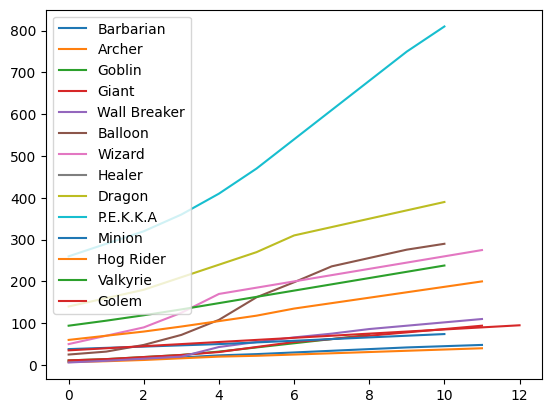

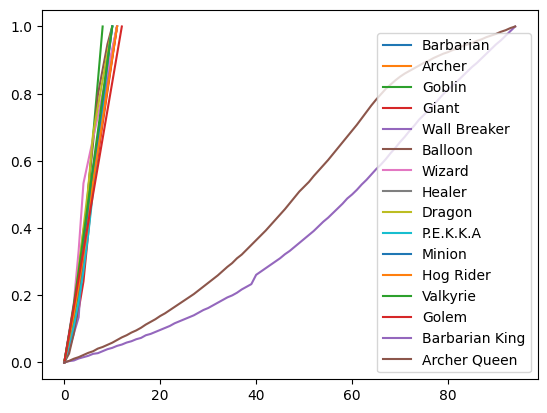

In [82]:
def normalize_dps(dps):
    if(len(dps) == 0):
        return []
    return (dps-np.min(dps))/(np.max(dps)-np.min(dps))



def plot_dps(normilized_dps=False, heros=False):
    for row in df.iterrows():
        if row[1]['name'] != 'Barbarian King' and row[1]['name'] != 'Archer Queen':
            if normilized_dps:
                plt.plot(normalize_dps(row[1]['dps']), label = row[1]['name'])
            else:
                plt.plot(row[1]['dps'], label = row[1]['name'])
        else:
            if heros:
                if normilized_dps:
                    plt.plot(normalize_dps(row[1]['dps']), label = row[1]['name'])
                else:
                    plt.plot(row[1]['dps'], label = row[1]['name'])
        
    plt.legend() 
    plt.show()
    
plot_dps(normilized_dps=False, heros=False)
plot_dps(normilized_dps=True, heros=True)